# DengAI: Predicting Disease Spread

Hosted by DrivenData: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/

Author: Justin Lam

Last edited: Fri, 6 Jan 2017

__City and Date Indicators:__
```
city                   – City abbreviations: sj for San Juan and iq for Iquitos
week_start_date        – Date given in yyyy-mm-dd format
```
__NOAA's GHCN daily climate data weather station measurements:__
```
station_max_temp_c                    – Maximum temperature
station_min_temp_c                    – Minimum temperature
station_avg_temp_c                    – Average temperature
station_precip_mm                     – Total precipitation
station_diur_temp_rng_c               – Diurnal temperature range
```
__PERSIANN satellite precipitation measurements (0.25x0.25 degree scale):__
```
precipitation_amt_mm                  – Total precipitation
```
__NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale):__
```
reanalysis_sat_precip_amt_mm          – Total precipitation
reanalysis_dew_point_temp_k           – Mean dew point temperature
reanalysis_air_temp_k                 – Mean air temperature
reanalysis_relative_humidity_percent  – Mean relative humidity
reanalysis_specific_humidity_g_per_kg – Mean specific humidity
reanalysis_precip_amt_kg_per_m2       – Total precipitation
reanalysis_max_air_temp_k             – Maximum air temperature
reanalysis_min_air_temp_k             – Minimum air temperature
reanalysis_avg_temp_k                 – Average air temperature
reanalysis_tdtr_k                     – Diurnal temperature range
```
__Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements::__
```
ndvi_se                               – Pixel southeast of city centroid
ndvi_sw                               – Pixel southwest of city centroid
ndvi_ne                               – Pixel northeast of city centroid
ndvi_nw                               – Pixel northwest of city centroid
```

## Explore the Data

In [1]:
# The sacred imports of data science:
%matplotlib inline

from __future__ import print_function
from __future__ import division

# Analysis
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Data viz
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df_features = pd.read_csv('dengue_features_train.csv',index_col=[0,1,2])
df_labels   = pd.read_csv('dengue_labels_train.csv',  index_col=[0,1,2])

# Preview of data
df_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k        ...          \
city year weekofyear                                   ...           
sj   1990 18                              299.8        ...           
          19                              300.9        ...           
          20                              300.5        ...           
          21                              301.4        ...           
          22                              301.9        ...           

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000     

In [3]:
# Preview of outcomes
df_labels.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

In [4]:
# General info of data
df_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, (sj, 1990, 18) to (iq, 2010, 25)
Data columns (total 21 columns):
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip_amt_kg_per_m2          1446 non-null float64
reanalysis_relative_humidity_percent     1446 non-null float64
reanalysis_sat_precip_amt_mm             1443 non-nu

## Questions for Analysis
**Main Objective:** 

1. Predict the total cases of dengue outbreak in each week of the year for the two cities.

**Basic Questions:**

1. What environmental factors correlate the highest with dengue outbreak?
2. How quickly has dengue spread to surrounding locations?

### Data Munging
Let's clean up the data and perform preliminary analysis. To start, let's just see what the data looks like by removing all the NaN values.

In [5]:
# Find out how incomplete the dataset is
df_features.isnull().sum()

week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_precip_mm                         22
dtype: int64

In [6]:
# Let's drop all the NaN data for now
df_features['total_cases'] = df_labels['total_cases']
df_features_dropped = df_features.dropna(axis=0).drop(['week_start_date'], axis=1)

print('Full size : ',df_features.shape)
print('After     : ',df_features_dropped.shape)

Full size :  (1456, 22)
After     :  (1199, 21)


In [7]:
# Find out how much data we lost
omitted = df_features.index.size - df_features_dropped.index.size
total_nan = df_features.isnull().sum().sum()

print('Number of data entries omitted: %d (%.1f%% of total)' %(omitted, omitted/df_features.index.size*100))
print('Total number of missing data  : %d (%.1f%% of total)' %(total_nan,total_nan/df_features.size*100))

Number of data entries omitted: 257 (17.7% of total)
Total number of missing data  : 548 (1.7% of total)


Thus 1.5% of the data will have to be assumed, which shouldn't change much. However, dropping all the rows results in ~20% loss of data so we'll need to interpolate the missing entries.

In [8]:
# Seperate data for San Juan
sj_train_features = df_features.loc['sj']
sj_train_labels =   df_labels  .loc['sj']

# Separate data for Iquitos
iq_train_features = df_features.loc['iq']
iq_train_labels =   df_labels  .loc['iq']

print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 22)
labels  :  (936, 1)

Iquitos
features:  (520, 22)
labels  :  (520, 1)


In [9]:
# For now, let's just fill the empty datapoints with the next observed value
sj_train_features.fillna(method='bfill', inplace=True)
iq_train_features.fillna(method='bfill', inplace=True)

C:\Users\Justin\Anaconda3\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


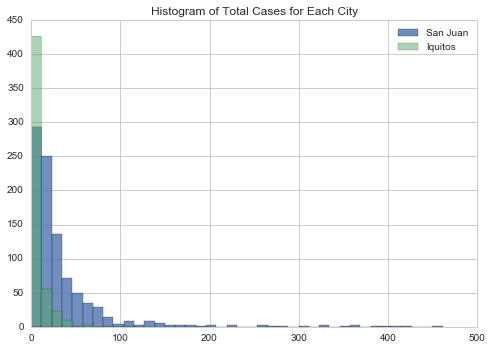

In [10]:
# Plot the histograms for each city
fig, ax = plt.subplots(1)

sj_train_labels.hist(ax=ax, alpha=0.8, label='San Juan',bins=40)
iq_train_labels.hist(ax=ax, alpha=0.5, label='Iquitos')

plt.title('Histogram of Total Cases for Each City')
plt.legend()

From the histogram above, it looks like the number of total cases follow an exponential probability distribution.

In [11]:
# Add column for total cases
sj_train_features['total_cases'] = sj_train_labels['total_cases']
iq_train_features['total_cases'] = iq_train_labels['total_cases']

# Compute the Pearson correlation coefficients
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


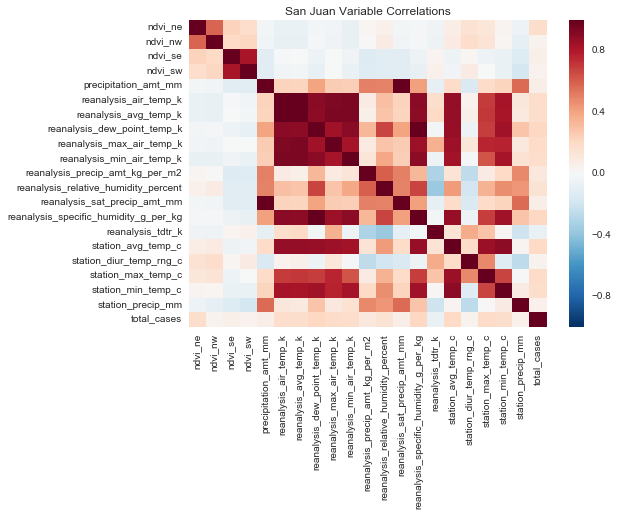

In [12]:
# Plot san juan correlation matrix
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Doesn't look like there's any strong correlations with total_cases. The climate parameters (temperature, humidity) seem to have strong correlations with each other though.

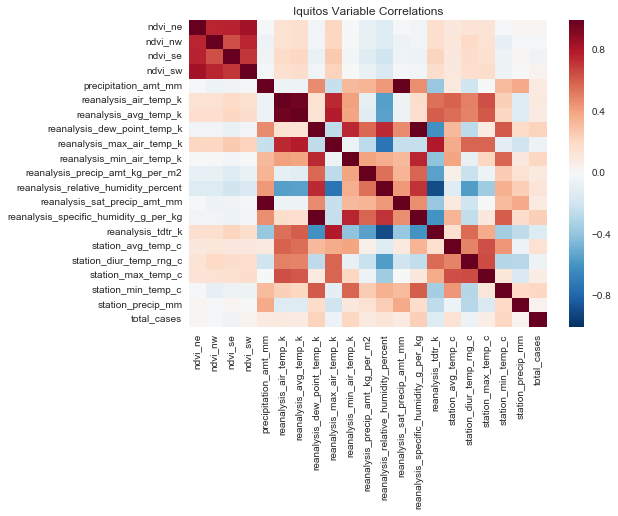

In [13]:
# Plot iquitos correlation matrix
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

In Iquitos, the vegetation indices are more correlated with each other than in San Juan.

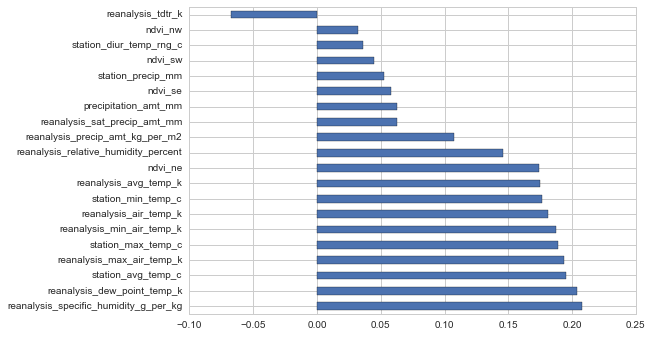

In [14]:
# San Juan correlations
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

Let's take a closer look at the correlations. Based on the [Pearson coefficient guidelines](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php), values between 0.1 and 0.3 are considered to have small association strengths.

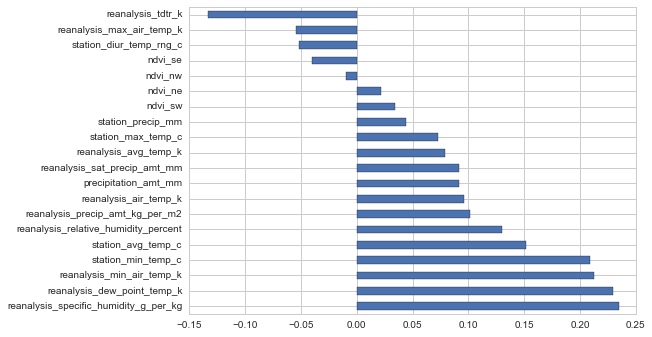

In [15]:
# Iquitos correlations
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

Same goes for 

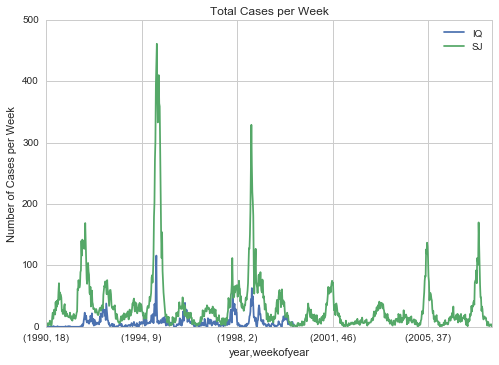

In [16]:
fig,ax = plt.subplots(1)

(iq_train_features
     .total_cases
     .plot(ax=ax,label='IQ'))

(sj_train_features
     .total_cases
     .plot(ax=ax,label='SJ'))

plt.legend()
plt.ylabel('Number of Cases per Week')
plt.title('Total Cases per Week')

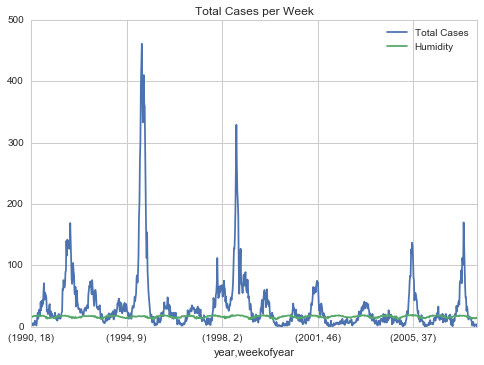

In [17]:
# Let's plot total cases vs humidity to see if there's anything interesting
fig,ax = plt.subplots(1)

(sj_train_features
     .total_cases
     .plot(ax=ax,label='Total Cases'))

(sj_train_features
     .reanalysis_specific_humidity_g_per_kg
     .plot(ax=ax,label='Humidity'))

plt.legend()
plt.title('Total Cases per Week')

In [20]:
# Import notebook debugger
from IPython.core.debugger import Tracer
# Tracer()() #this one triggers the debugger

# Summarize climate data based on length of mosquito lifecycle
def mosquito_lifecycle(df):
    # Number of weeks typical for mosquito life cycle
    cycle_length = 2
    
    n = df.shape[0]
    j = 0
    
    x = []
    
    # Setup the lifecycle array that we'll use groupby with
    for i in range(0,n):
        if(i % cycle_length == 0):
            j += 1
        x.append(j)
    
    # add to existing dataframe
    df['lifecycle'] = np.asarray(x)
    
    # reset index so we don't run into concatenation issues
    df = df.reset_index()
    
    g = df.groupby('lifecycle')
    
    # Take the mean of climate data during the two weeks
    temp = g[['humidity','dew_temp']].mean()
    
    # Add all reported cases within those two weeks (this might need to lag by two weeks actually)
    temp['cases'] = g['cases'].sum()
    
    # Reindex with date
    temp[['year','weekofyear']] = df.iloc[::2,3:5].reset_index().drop('index',axis=1)
    temp = temp.dropna(axis=0)
    
    temp.set_index(['year','weekofyear'],inplace=True)
    
    return temp

# Preprocess the data since we'll have to do it for both training and testing data
def preprocess_data(data_path, labels_path=None):
    index_cols = None
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=index_cols)
    
    # select features we want (ones with highest correlation)
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k']
    df = df[features]
    
    # fill missing values
    df.fillna(method='bfill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=index_cols)
        df = df.join(labels)
        
    df.rename(columns={features[0]:'humidity', 
                       features[1]:'dew_temp',
                       'total_cases':'cases'}, 
              inplace=True)

    df.set_index('city',inplace=True)
    
    # separate san juan and iquitos
    sj = mosquito_lifecycle(df.loc['sj'])
    iq = mosquito_lifecycle(df.loc['iq'])
    
    return sj, iq

# Preprocess the training data
sj_train, iq_train = preprocess_data('dengue_features_train.csv', labels_path="dengue_labels_train.csv")
sj_train.head()

C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


humidity    dew_temp  cases
year   weekofyear                              
1990.0 20.0        14.692857  293.182857      9
       22.0        16.760714  295.372143      7
       24.0        17.211429  295.836429      8
       26.0        17.605714  296.198571      9
       28.0        17.930714  296.515000     16

## The Model

Let's try to use Bayesian models as a prediction vehicle for dengue outbreaks.

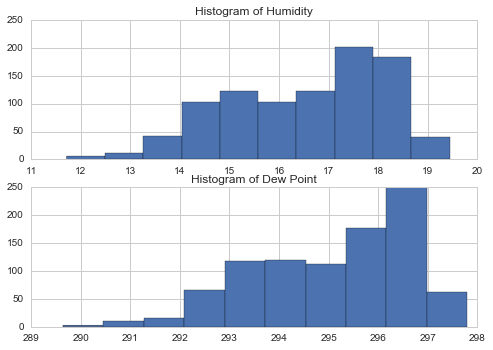

In [174]:
# Plot the histograms to see what kind of distributions we have
fig,ax = plt.subplots(2,1)

sj_train.humidity.hist(ax=ax[0])
ax[0].set_title('Histogram of Humidity')

sj_train.dew_temp.hist(ax=ax[1])
ax[1].set_title('Histogram of Dew Point')

In [175]:
# Import PyMC for markov chain monte carlo modeling
import pymc as pm
# import theano.tensor as tt

In [193]:

# Construct a proper model that represents mosquito-driven infections
def make_model(df):
    observed_cases = df.cases.values
    
    num_weeks = len(observed_cases)
    
    pop_data = pm.Normal('pop_data',mu=0,tau=0.001,size=num_weeks)
    
    @pm.stochastic(observed=True)
    def mosquito_pop(value=pop_data, mean=None, features=df):
        observed_humidity = df.humidity.values
        observed_dew_temp = df.dew_temp.values
        return np.exp()
    
    @pm.deterministic
    def carrier_pop(n_mosq=mosquito_pop):
        carrier_prob = 0.5
        return n_mosq*carrier_prob
    
    @pm.deterministic
    def n_infected(n_carriers=carrier_pop):
        return n_carriers*0.2
    
    cases = pm.Poisson('cases', mu=n_infected, value=observed_cases, observed=True)
    
    return pm.MCMC(locals())
    
# M = make_model(sj_train)

```
# First attempt with a log-linear model
def make_model(df):
    # PyMC likes numpy arrays better than pandas
    observed_humidity = df.humidity.values
    observed_dew_temp = df.dew_temp.values
    observed_cases = df.cases.values
    
    num_weeks = len(observed_cases)
    
    humidity_starting_points = np.log(observed_humidity)
    dew_temp_starting_points = np.log(observed_dew_temp)
    
    tau_hum = pm.Gamma('tau_hum', 0.1, 0.1, value=10)
    tau_dew = pm.Gamma('tau_dew', 0.1, 0.1, value=10)
    
    humidity_star = pm.Normal('humidity_star', mu=0, tau=tau_hum, size=num_weeks, value=humidity_starting_points)
    dew_temp_star = pm.Normal('dew_temp_star', mu=0, tau=tau_dew, size=num_weeks, value=dew_temp_starting_points)
    
    # Hyperpriors
#     humidity_n = pm.Normal('humidity_n',0,0.0001)
#     dew_temp_n = pm.Normal('dew_temp_n',0,0.0001)
    intercept = pm.Normal('intercept',0,.0001,value=0)
 
    # trick to code the sum-to-zero constraint
    @pm.deterministic
    def humidity(humidity_star=humidity_star):
        humidity = humidity_star.copy()
        humidity = humidity - np.mean(humidity_star)
        return humidity
    
    @pm.deterministic
    def dew_temp(dew_temp_star=dew_temp_star):
        dew_temp = dew_temp_star.copy()
        dew_temp = dew_temp - np.mean(dew_temp_star)
        return dew_temp
    
    # log-linear model
    @pm.deterministic
    def cases_theta(humidity=humidity, dew_temp=dew_temp, intercept=intercept):
        return np.exp(intercept + humidity + dew_temp)
    
    cases = pm.Poisson('cases', mu=cases_theta, value=observed_cases, observed=True)

    # put everything we've modeled into a PyMC model
    return pm.MCMC(locals())
    
M = make_model(sj_train)
# M = pm.MCMC(model)
```

In [ ]:
# sample from our posterior distribution 50,000 times, but
# throw the first 20,000 samples out to ensure that we're only
# sampling from our steady-state posterior distribution
M.sample(iter=50000, burn=20000)

In [ ]:
# Visualize autocorrelation convergence
pm.Matplot.plot(M)

Convergence for dew temp and humidity look okay, except the intercept is less than ideal...

In [ ]:
# Use 2/3 for training, 1/3 for testing
split_index = round(len(sj_train) * 2/3)

# Splits a dataframe for testing/training
def split_df(df, index):
    df_training = df.iloc[:split_index,:]
    df_testing  = df.iloc[split_index:,:]

    return df_training, df_testing

sj_training, sj_testing = split_df(sj_train, split_index)

In [ ]:
def simulate_season(df, M):
#     num_samples = M.humidity.trace().shape[0]
    num_samples = df.shape[0]
    draw = np.random.randint(0, num_samples)

    season = df.copy()
    season['humidity_pred'] = M.humidity.trace()[draw, :num_samples]
    season['dew_temp_pred'] = M.dew_temp.trace()[draw, :num_samples]
    season['intercept']     = M.intercept.trace()[draw]
    
    season['cases_theta'] = season.apply(lambda x: np.exp(x['intercept'] + x['humidity_pred'] + x['dew_temp_pred']),axis=1)
    season['cases_pred']  = season.apply(lambda x: np.random.poisson(x['cases_theta']),axis=1)
    
    # Reindex the dataframe
#     year.index = index
#     print(season.head())
    
    return season

def create_season_table(df):
    return
    
# This import shows a progress bar
from tqdm import tnrange, tqdm_notebook

def run_simulations(df, M, n=10):
    dfs = []
    for i in tnrange(n, desc='Iterations'):
        s = simulate_season(df, M)
        s['iteration'] = i
        dfs.append(s)
    return pd.concat(dfs)

simuls = run_simulations(sj_testing, M, n=50)

In [ ]:
# Visualize the observed vs predicted cases based on the training data
simuls[['cases','cases_pred']].groupby(level=['year','weekofyear']).mean().plot()
plt.title('Measured vs Predicted Dengue Cases')

Obviously the model isn't working properly, so we need to fix that...

In [ ]:
df_result = pd.concat([sj_train, simuls['cases_pred'].groupby(level=['year','weekofyear']).mean()], axis=1)
df_result[['cases','cases_pred']].plot()
plt.title('Measured vs Predicted Dengue Cases')

In [ ]:
sj_train.iloc[:5,:]

In [ ]:
simuls.head()